In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('dataset.csv')
df.head(10)
df.shape


(4452, 2)

In [68]:
images_train = [tf.keras.utils.normalize(cv2.imread('images/'+x,0)) for x in df['id'][0:2672]]
images_test = [tf.keras.utils.normalize(cv2.imread('images/'+x,0)) for x in df['id'][2672:]]

In [97]:
y_train = list(df['class'][0:2672])
for i,x in enumerate(y_train):
    if x==2:
        y_train[i]=0
y_test = list(df['class'][2672:])
for i,x in enumerate(y_test):
    if x==2:
        y_test[i]=0

images_train =  np.array(images_train).reshape(2672, 200, 200,1)
images_test = np.array(images_test).reshape(1780, 200, 200,1)


In [104]:
def show_train(i):
    plt.imshow(images_train[i].reshape(200,200),cmap='gray')
    plt.show()
    print(y_train[i])
def show_test(i):
    plt.imshow(images_test[i].reshape(200,200),cmap='gray')
    plt.show()

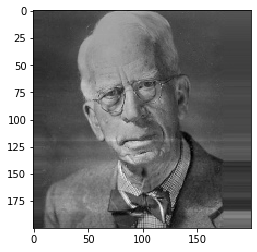

0


In [79]:
show_test(495)

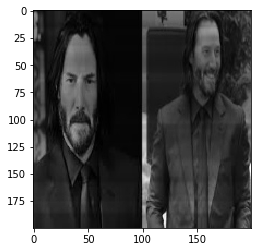

1


In [80]:
show_train(124)

In [33]:
%load_ext tensorboard
%tensorboard --logdir log

In [98]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
model = tf.keras.Sequential()

# block 1
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200,1)))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(64, (4, 4), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((5, 5)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.4))
model.add(Dense(2,activation = "sigmoid"))

model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])

In [99]:
model.fit(images_train,y_train,epochs = 50,batch_size=64,callbacks=[tf.keras.callbacks.TensorBoard('log',histogram_freq=1)])

W0622 01:03:04.487121 140297400039232 deprecation.py:323] From /home/yatharthmathur/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2672 samples
Epoch 1/50
2672/2672 [==============================] - 65s 24ms/sample - loss: 0.6387 - accuracy: 0.6980
Epoch 2/50
2672/2672 [==============================] - 68s 25ms/sample - loss: 0.5154 - accuracy: 0.7017
Epoch 3/50
2672/2672 [==============================] - 72s 27ms/sample - loss: 0.4464 - accuracy: 0.7159
Epoch 4/50
2672/2672 [==============================] - 64s 24ms/sample - loss: 0.3820 - accuracy: 0.8005
Epoch 5/50
2672/2672 [==============================] - 61s 23ms/sample - loss: 0.2633 - accuracy: 0.8963
Epoch 6/50
2672/2672 [==============================] - 64s 24ms/sample - loss: 0.2096 - accuracy: 0.9180
Epoch 7/50
2672/2672 [==============================] - 64s 24ms/sample - loss: 0.1693 - accuracy: 0.9360
Epoch 8/50
2672/2672 [==============================] - 63s 23ms/sample - loss: 0.1222 - accuracy: 0.9581
Epoch 9/50


KeyboardInterrupt: 

In [100]:
score = model.evaluate(images_test, y_test, batch_size=64)
print(score)

1780/1780 [==============================] - 10s 6ms/sample - loss: 0.1353 - accuracy: 0.9534
[0.13530639420064647, 0.9533708]


In [102]:
predictions = model.predict_classes(images_test)

In [103]:
predictions

array([0, 1, 1, ..., 1, 1, 1])

In [149]:
def predict(i):
    img = cv2.imread(i,0)
    plt.imshow(img, cmap='gray')
    plt.show()
    img = cv2.imread(i,0)
    img = cv2.resize(img,(200,200))
    img = tf.keras.utils.normalize(img)
    img = img.reshape(1,200,200,1)
    if model.predict_classes(img):
        print("IT'S BREATHTAKING")
    else:
        print("NOT SO BREATHTAKING")

In [161]:
def predict_test(i):
    show_test(i)
    if predictions[i]:
        print("IT'S BREATHTAKING")
    else:
        print("NOT SO BREATHTAKING")

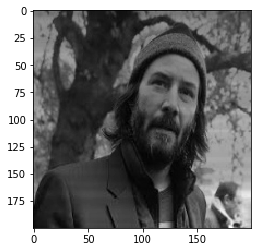

IT'S BREATHTAKING


In [162]:
predict_test(420)

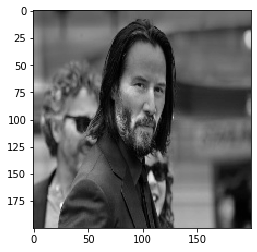

IT'S BREATHTAKING


In [163]:
predict_test(213)

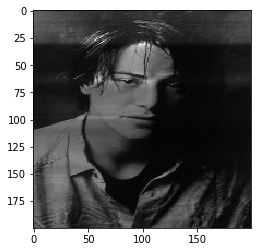

IT'S BREATHTAKING


In [175]:
predict_test(675)

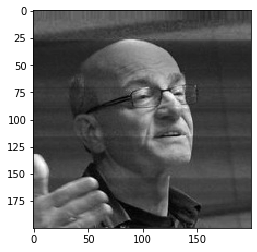

NOT SO BREATHTAKING


In [166]:
predict_test(1021)

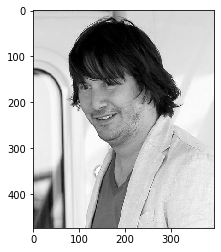

IT'S BREATHTAKING


In [150]:
predict('1.jpg')

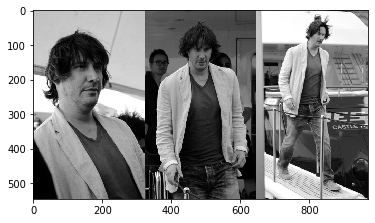

IT'S BREATHTAKING


In [151]:
predict('2.jpg')

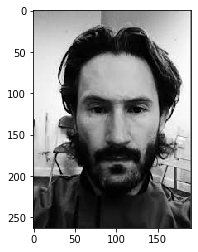

NOT SO BREATHTAKING


In [152]:
predict('3.jpg')

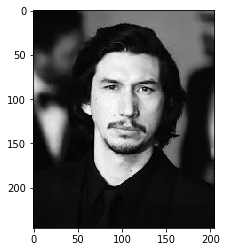

NOT SO BREATHTAKING


In [153]:
predict('4.jpg')

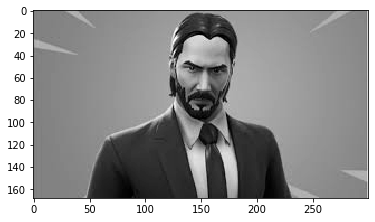

IT'S BREATHTAKING


In [154]:
predict('5.jpg')

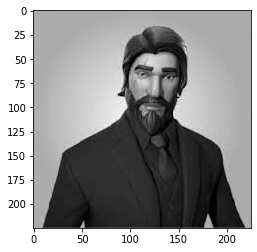

IT'S BREATHTAKING


In [155]:
predict('6.jpg')

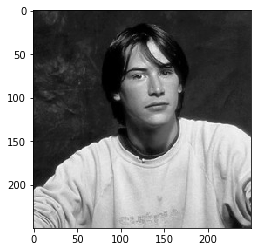

IT'S BREATHTAKING


In [176]:
predict('7.jpg')

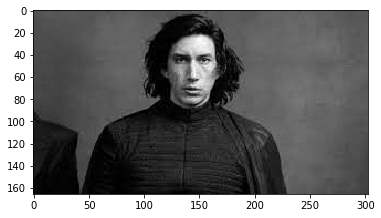

IT'S BREATHTAKING


In [177]:
predict('8.jpg')

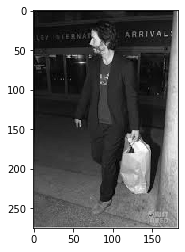

IT'S BREATHTAKING


In [178]:
predict('9.jpg')

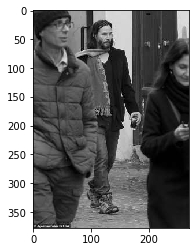

IT'S BREATHTAKING


In [179]:
predict('10.jpg')

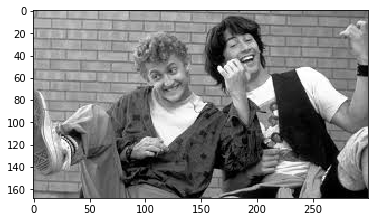

IT'S BREATHTAKING


In [180]:
predict('11.jpg')

In [156]:
# SAVE MODEL
json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(json)
model.save_weights('model2.h5')

In [ ]:
#LOAD MODEL

from tensorflow.keras.models import model_from_json
json = open('model2.json','r')
model = json.read()
model = model_from_json(model)
model.load_weights('model2.h5')
print(model)